# Lab 5: Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import ttest_ind
import statistics
import math
import matplotlib.pyplot as plt


## Read in and prepare the data

In [2]:
who2009 = pd.read_csv("who2009.csv")

who2009.shape

(193, 267)

In [3]:
who2009 = who2009[["country", "v9", "v22", "v159", "v168", "v174","v186","v192", "v249", "v259","regionname"]]
who2009 = who2009.rename(columns = {"v9":"life_exp", 
                          "v22":"infant_mortality", 
                          "v159":"phys_density", 
                          "v168":"hospital_bed", 
                          "v174":"health_exp_percent_GDP", 
                          "v186":"OOP_percent_exp",
                          "v192":"health_exp_PC",
                          "v249":"fertility_rate",
                          "v259":"GNI_PC"
                          })

Text(0.5, 0, 'Gross national income per capita, 2007 (PPP int. $)')

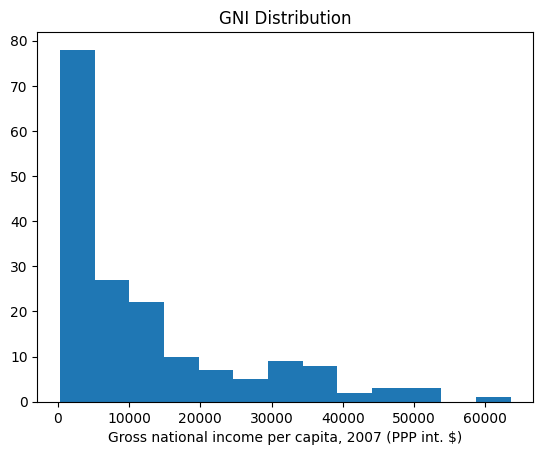

In [4]:
# plt.hist(who2009["GNI_PC"])
plt.hist(who2009['GNI_PC'].dropna(), bins='auto')
# plt.plot(who2009["GNI_PC"])
plt.title('GNI Distribution')
plt.xlabel('Gross national income per capita, 2007 (PPP int. $)')


## Conduct a one-sample t-test from scratch

In [5]:
europe_who2009 = who2009[who2009['regionname'] == "Europe"]

# t = (mu - M) / (s / sqrt(n))
# where s = sqrt((1/(n-1)) * summation(i=1)(n)((x_i - mu)^2))


In [6]:
def summ(list, mu, n):
    sum = 0
    for i in range(n):
        sub = pow(list[i] - mu, 2)
        sum = sum + sub
    return sum

def t_test(data, M):
    data = data.to_numpy()
    # define basic vars
    mu = data.mean()
    n = len(data)
    # sample std dev
    summation = summ(data, mu, n)
    s = math.sqrt((1/(n-1)) * summation)
    # test statistic
    num = mu - M
    denom = s / math.sqrt(n)
    t_stat = num / denom
    # p-value
    p_t = t.cdf(abs(t_stat), df=n-1)
    p_val = 2 * (1 - p_t)
    return t_stat, p_val

In [7]:
life_exp1 = t_test(europe_who2009["life_exp"], 70)
life_exp2 = t_test(europe_who2009["life_exp"], 76)
life_exp1b = stats.ttest_1samp(europe_who2009["life_exp"], 70)
life_exp2b =stats.ttest_1samp(europe_who2009["life_exp"], 76)
print(life_exp1,life_exp1b,'\n')
print(life_exp2, life_exp2b,'\n')
print("life_exp of 70 test statistic compare: ",life_exp1[0]-life_exp1b.statistic)
print("life_exp of 70 pvalue compare: ",life_exp1[1]-life_exp1b.pvalue,'\n')
print("life_exp of 76 test statistic compare: ",life_exp2[0]-life_exp2b.statistic)
print("life_exp of 76 pvalue compare: ",life_exp2[1]-life_exp2b.pvalue)

(9.938016169764737, 1.7605916724505732e-12) TtestResult(statistic=9.938016169764737, pvalue=1.760564922569916e-12, df=41) 

(1.1814424817202844, 0.24423470312189988) TtestResult(statistic=1.1814424817202844, pvalue=0.24423470312189974, df=41) 

life_exp of 70 test statistic compare:  0.0
life_exp of 70 pvalue compare:  2.674988065727803e-17 

life_exp of 76 test statistic compare:  0.0
life_exp of 76 pvalue compare:  1.3877787807814457e-16


Answer the following in your writeup:
(a) How do you choose the fixed number M in this test?
(b) What are the null and alternative hypotheses for the one-sample t-test conducted
here?
(c) Explain the equation for the p-value. What is it doing?
(d) Is life expectancy in Europe significantly different from 70 years or 76 years? How
do you know?
(e) Did your function produce the same results as the built in version?

## Conduct a two-sample t-test from scratch

In [8]:
asia_who2009 = who2009[who2009['regionname'] == "Asia"]

In [9]:
def t_test_2samp(data1, data2):
    # define basic vars
    mu1, mu2 = data1.mean(), data2.mean()
    n1, n2 = len(data1), len(data2)

    # sample std dev
    std1, std2 = data1.std(ddof=1), data2.std(ddof=1)
    # test statistic
    num = (mu1 - mu2)
    denom = math.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2))
    t_stat = num / denom

    free = (std1 ** 2 / n1 + std2 ** 2 / n2) ** 2 / (
        ((std1**4)/((n1**2)*(n1-1))) + ((std2**4)/((n2**2)*(n2-1)))
        )

    # p-value
    p_t = t.cdf(abs(t_stat), df=free)
    p = 2 * (1 - p_t)
    return t_stat, p


In [10]:
my_results = t_test_2samp(europe_who2009['life_exp'], asia_who2009['life_exp'])
built_in_results = ttest_ind(europe_who2009['life_exp'], asia_who2009['life_exp'])
print("My results: ",my_results,'\n')
print("Built in: ",built_in_results,'\n')
print("p-val diff:",my_results[1]-built_in_results.pvalue,'\n')
print("test stat diff: ",my_results[0]-built_in_results.statistic)


My results:  (5.884174172667128, 1.0064936417641945e-07) 

Built in:  Ttest_indResult(statistic=5.7264993312056856, pvalue=1.4371220565085468e-07) 

p-val diff: -4.306284147443522e-08 

test stat diff:  0.15767484146144284


## Pearson’s Correlation from scratch

In [11]:
def pearson_corr(data, var1, var2):
    n = len(data)
    print(n)
    mu1, mu2 = data[var1].mean(), data[var2].mean()
    num = sum((data[var1] - mu1) * (data[var2] - mu2))
    denom = ((sum((data[var1] - mu1) ** 2)) ** 0.5) * ((sum((data[var2] - mu2) ** 2)) ** 0.5)
    
    r = num / denom
    test_stat = r * math.sqrt((n - 2) / (1 - r ** 2))
    p_cdf = t.cdf(abs(test_stat), df=(n - 2))
    p_value = 2 * (1 - p_cdf)
    return p_value, test_stat, r

In [12]:
my_comp = pearson_corr(who2009, "life_exp", "infant_mortality")
built_in_comp = stats.linregress(who2009['life_exp'], who2009['infant_mortality'])
rval = built_in_comp.rvalue
tstat = rval / ((1 - rval ** 2) / (len(who2009) - 2)) ** 0.5
print("My results: ",my_comp,'\n')
print("Built in: ",built_in_comp,'\n')
print("tstat for built in calc'd:", tstat)
print("p-val diff:",my_comp[0]-built_in_comp.pvalue,'\n')
print("r-val diff: ",my_comp[2]-built_in_comp.rvalue)
print("test stat diff: ",my_comp[1]-tstat)



193
My results:  (0.0, -33.78040820171774, -0.9255371904433332) 

Built in:  LinregressResult(slope=-3.1186864983548186, intercept=247.02571151792557, rvalue=-0.9255371904433327, pvalue=1.733832757295465e-82, stderr=0.09232234494419889, intercept_stderr=6.333447860796562) 

tstat for built in calc'd: -33.78040820171762
p-val diff: -1.733832757295465e-82 

r-val diff:  -4.440892098500626e-16
test stat diff:  -1.2079226507921703e-13
